## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
# Start solution here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge



In [2]:
dfcamera=pd.read_csv("camera_dataset.csv")
dfcamera= pd.DataFrame(dfcamera)
dfcamera.info()
dfcamera.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [3]:

print(dfcamera.isnull().sum())
df = dfcamera.dropna()

print(df.isna().any())

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64
Model                      False
Release date               False
Max resolution             False
Low resolution             False
Effective pixels           False
Zoom wide (W)              False
Zoom tele (T)              False
Normal focus range         False
Macro focus range          False
Storage included           False
Weight (inc. batteries)    False
Dimensions                 False
Price                      False
dtype: bool


In [4]:
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.00000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,2003.584942,2473.084942,1774.859073,4.589768,32.955598,121.544402,44.13417,7.785714,17.447876,319.265444,105.363417,457.921815
std,2.724291,759.385536,829.480329,2.842849,10.341229,93.544197,24.16390,8.103702,27.440655,260.410137,24.262761,761.088735
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.00000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.00000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.00000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.00000,85.000000,450.000000,1860.000000,240.000000,7999.000000


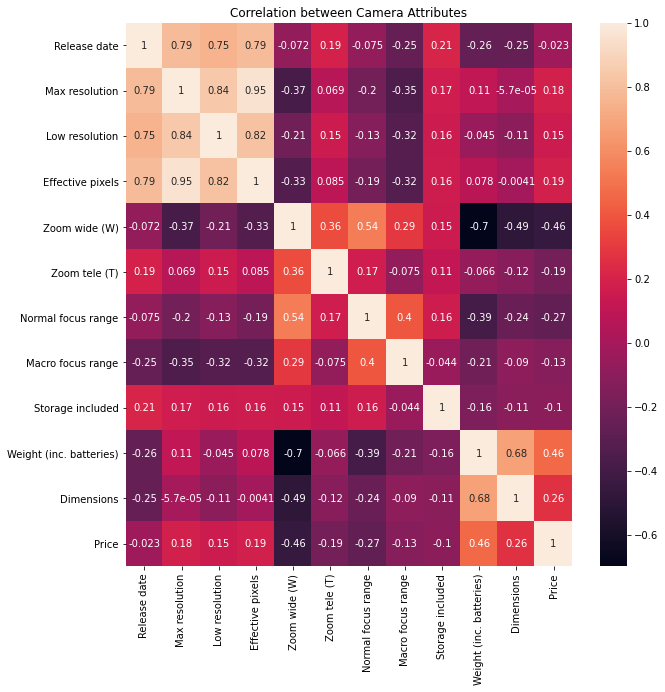

In [5]:
#Showing correlation between all camera attributes (1 showing posititive correlation)
corr_df = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_df, annot=True, ax=ax)
plt.title('Correlation between Camera Attributes')

plt.show()

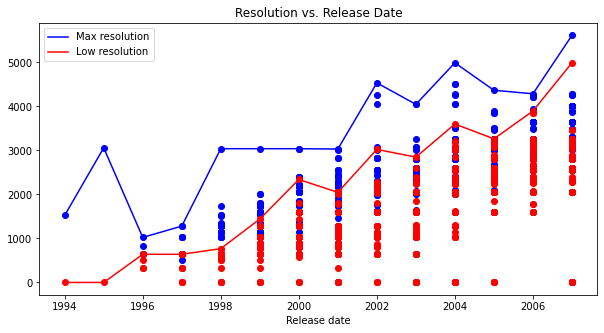

In [6]:
#plotting resolution against release date
grouped_df = df.groupby('Release date')

plt.figure(figsize=(10,5))
plt.scatter(x = df['Release date'], y = df['Max resolution'], c='blue')
plt.scatter(x=df['Release date'], y=df['Low resolution'],c='red')
grouped_df['Max resolution'].max().plot(color='blue',legend=True)
grouped_df['Low resolution'].max().plot(color='red',legend=True)

plt.title("Resolution vs. Release Date")
plt.show()

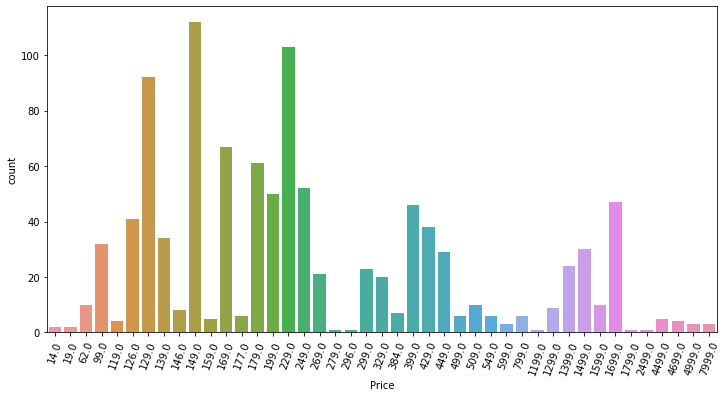

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='Price', data=df)

plt.xticks(rotation = 70)
plt.show()


In [8]:
print("Avg Camera Price ($):", df["Price"].mean())

Avg Camera Price ($): 457.9218146718147


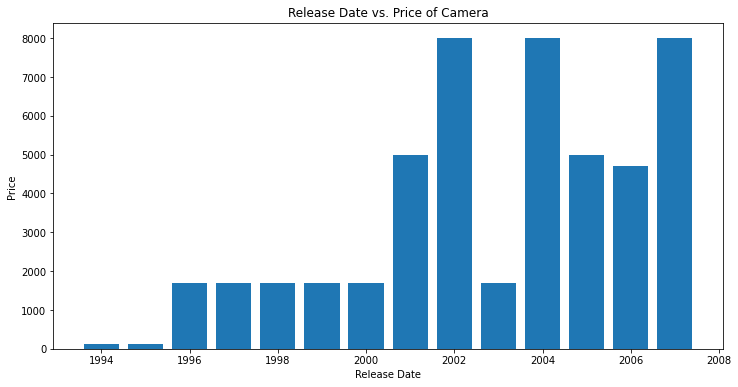

In [9]:
plt.figure(figsize=(12,6))
plt.bar(df['Release date'], df['Price'])
plt.title('Release Date vs. Price of Camera')
plt.ylabel('Price')
plt.xlabel('Release Date')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  import sys


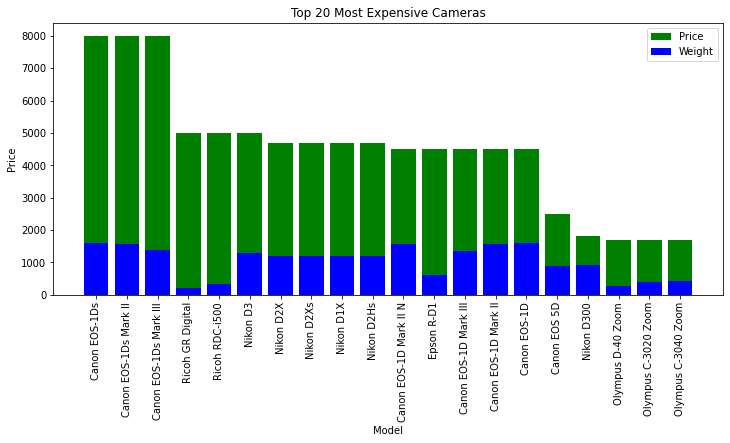

In [10]:
dfSortedHigh = df[df['Price'] > 1000]
dfSorted1 = dfSortedHigh.sort_values(by='Price', ascending=False)
dfSorted2 = dfSorted1.head(20)

plt.figure(figsize=(12,5))
plt.bar(dfSorted2['Model'],dfSorted2['Price'],label = 'Price', color = "G")
plt.bar(dfSorted2['Model'],dfSorted2['Weight (inc. batteries)'], label = 'Weight', color = "B")

plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Top 20 Most Expensive Cameras')

plt.legend()
plt.show()

Partitioning Data into Test and Train


In [11]:
#set index to Model
df2 = df.set_index('Model')

my_list = df2.columns.tolist()
print(my_list)

df2 = df2[['Price','Release date', 'Max resolution', 'Low resolution', 'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)', 'Normal focus range', 'Macro focus range', 'Storage included', 'Weight (inc. batteries)', 'Dimensions']]
print(df2)

x = df2.iloc[:, 1:]
y = df2.iloc[:, 0]
#x = df2.drop(['Price'], axis=1)
#y = df2['Price']

from sklearn.preprocessing import StandardScaler
column = x.columns
scaler = StandardScaler()
x[column] = scaler.fit_transform(x[column])

['Release date', 'Max resolution', 'Low resolution', 'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)', 'Normal focus range', 'Macro focus range', 'Storage included', 'Weight (inc. batteries)', 'Dimensions', 'Price']
                         Price  ...  Dimensions
Model                           ...            
Agfa ePhoto 1280         179.0  ...        95.0
Agfa ePhoto 1680         179.0  ...       158.0
Agfa ePhoto CL18         179.0  ...         0.0
Agfa ePhoto CL30         269.0  ...         0.0
Agfa ePhoto CL30 Clik!  1299.0  ...       128.0
...                        ...  ...         ...
Toshiba PDR-M65           62.0  ...       120.0
Toshiba PDR-M70           62.0  ...       116.0
Toshiba PDR-M71           62.0  ...       107.0
Toshiba PDR-M81           62.0  ...       107.0
Toshiba PDR-T10          129.0  ...        86.0

[1036 rows x 12 columns]


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2020)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(725, 11)
(725,)
(311, 11)
(311,)


Computing the baseline classification accuracy

In [13]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(x_train,y_train)
baseline = dummy_classifier.score(x_test,y_test)
print("Baseline Accuracy is:", baseline)

Baseline Accuracy is: 0.10289389067524116


Log Reg


In [14]:
model = LogisticRegression(random_state= 2020, max_iter= 999)
model.fit(x_train, y_train)
predModel = model.predict(x_test)
accuracy = accuracy_score(y_test, predModel)
cvsModel = np.average(cross_val_score(model, x, y, cv = 10))

print("Accuracy is: ", accuracy)

print("Cross Validation Score is:", cvsModel)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy is:  0.21221864951768488
Cross Validation Score is: 0.15069081404032858


In [15]:
reg = Lasso(alpha=0.5)
reg.fit(x_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
print('Lasso Regression, R^2 score on training set: ', reg.score(x_train, y_train)*100)
print('Lasso Regression, R^2 score on test set: ', reg.score(x_test, y_test)*100)

Lasso Regression, R^2 score on training set:  30.909896181573675
Lasso Regression, R^2 score on test set:  25.97548977231736


Decision Tree

In [17]:
cam_dt = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=2020)
cam_dt.fit(x_train,y_train)

y_pred = cam_dt.predict(x_test)

training_pred = cam_dt.predict(x_train)
acc_training = accuracy_score(training_pred, y_train)
acc_testing = accuracy_score(y_pred, y_test)

print("Training Accuracy is:", acc_training)
print("Testing Accuracy is: ", acc_testing)

Training Accuracy is: 0.3931034482758621
Testing Accuracy is:  0.3086816720257235


SVM

In [18]:
SVM_model = svm.SVC(C = 1, kernel ='rbf', probability = True)
SVM_model.fit(x_train,y_train)

predict_SVM = SVM_model.predict(x_test)
SVM_accuracy = accuracy_score(y_test, predict_SVM)

SVM_cv= np.mean(cross_val_score(SVM_model, x , y, cv = 10))

print("Accuracy is: ", SVM_accuracy)
print("Cross Validation Score is: " , SVM_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy is:  0.2508038585209003
Cross Validation Score is:  0.19792755787901414


Ensemble Models

In [25]:
#bagging

bag_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators= 10, random_state= 2020)
bag_model.fit(x_train, y_train)
pred_bag = bag_model.predict(x_test)

bagging_acc = accuracy_score(y_test, pred_bag)
bagging_cv = np.average(cross_val_score(bag_model,x, y, cv = 10))

print("Accuracy is: ", bagging_acc)
print("Cross Validation Score is: ", bagging_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy is:  0.5305466237942122
Cross Validation Score is:  0.3388349514563106


Random Forest


In [20]:
#random forest

rf_model = RandomForestClassifier(n_estimators=100, max_features= 7, random_state= 2020)
rf_model.fit(x_train, y_train)

pred_rf = rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, pred_rf)

rf_CVS = np.average(cross_val_score(rf_model, x, y, cv = 10))

print('Accuracy is:', rf_acc)
print('Cross Validation Score is: ', rf_CVS)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy is: 0.5755627009646302
Cross Validation Score is:  0.3609970126960418


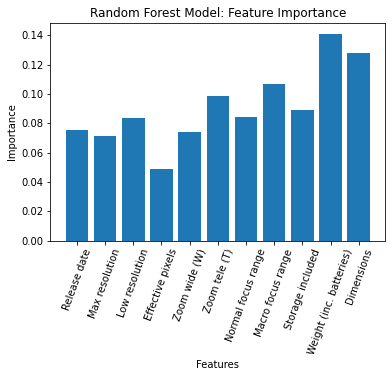

In [21]:
#random forest feature importance
feature_importances = rf_model.feature_importances_
features = x_train.columns
df4 = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest
df4

f1 = plt.figure() 
plt.bar(features, rf_model.feature_importances_)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Model: Feature Importance')
plt.xticks(rotation = 70)
plt.show()

In [22]:
#ADABOOST
ada_base = DecisionTreeClassifier(max_depth=10)
ada_boost = AdaBoostClassifier(ada_base, n_estimators=200, random_state= 2020, learning_rate=.05)
ada_boost.fit(x_train, y_train)
ada_cv = np.average(cross_val_score(ada_boost, x, y, cv= 10))

print("Accuracy is:", accuracy_score(y_test, ada_boost.predict(x_test)))
print("Cross Validation Score is: ", ada_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy is: 0.5787781350482315
Cross Validation Score is:  0.3725728155339806


Voting Ensemble

In [26]:
vote_model = VotingClassifier(estimators = [('rf',rf_model), ('ada', ada_boost), ('bag', bag_model)], voting='soft') 
vote_model.fit(x_train, y_train)
vote_pred= vote_model.predict(x_test)
vote_cv = np.average(cross_val_score(vote_model, x, y, cv = 10))

print('Accuracy score is:', accuracy_score(y_test, vote_pred))
print("Cross Validation Score: ", vote_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy score is: 0.5819935691318328
Cross Validation Score:  0.3773805078416729
